Load and Inspect **Data**

In [3]:
import pandas as pd
df = pd.read_csv("/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 Clean the Data

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.drop('customerID', axis=1, inplace=True)
df.dropna(inplace=True)


*Visual EDA*

<Axes: xlabel='Churn', ylabel='count'>

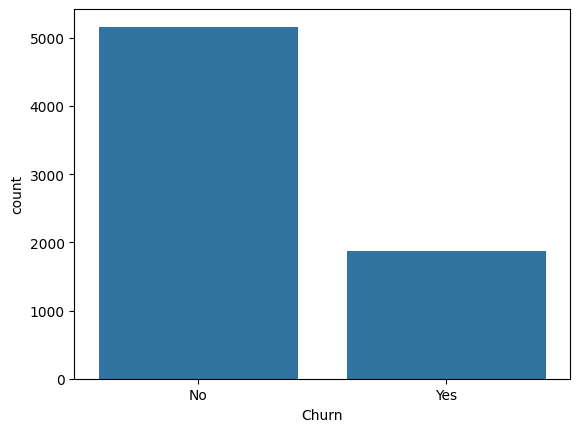

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)



<Axes: xlabel='Churn', ylabel='tenure'>

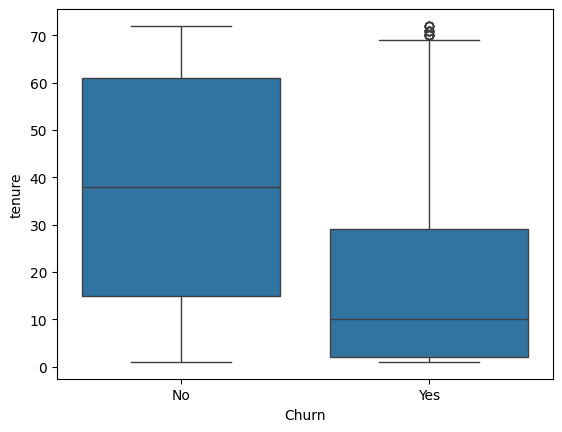

In [6]:
sns.boxplot(x='Churn', y='tenure', data=df)


<Axes: xlabel='Contract', ylabel='count'>

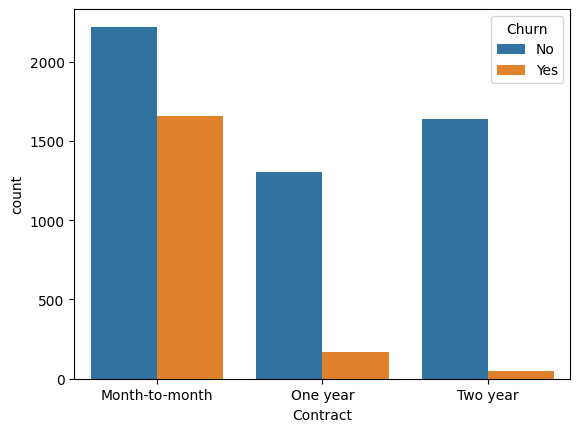

In [7]:
sns.countplot(x='Contract', hue='Churn', data=df)

**Preprocessing**

1. One-hot encode categorical variables.

2. Split into train/test sets.





In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Encode target

X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
X_train

array([[-0.44032709,  0.43099834, -0.52347742, ..., -0.5253508 ,
        -0.71186341, -0.54360352],
       [-0.44032709, -1.19876011, -0.37888149, ...,  1.90349   ,
        -0.71186341, -0.54360352],
       [-0.44032709,  0.91992587,  0.4305233 , ..., -0.5253508 ,
         1.40476387, -0.54360352],
       ...,
       [-0.44032709, -0.95429635,  0.54354081, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.44032709,  0.71620607, -1.49742241, ..., -0.5253508 ,
        -0.71186341, -0.54360352],
       [ 2.27103902, -0.50611277,  0.29423748, ..., -0.5253508 ,
         1.40476387, -0.54360352]])

In [10]:
y_train

,Churn
6030,1
3410,1
5483,1
5524,0
6337,0
...,...
3778,0
5199,0
5235,0
5399,0


In [11]:
X_test

array([[ 2.27103902,  1.16438964, -1.32291009, ..., -0.5253508 ,
        -0.71186341, -0.54360352],
       [-0.44032709, -0.54685673, -1.33288222, ..., -0.5253508 ,
        -0.71186341, -0.54360352],
       [-0.44032709, -0.7913205 ,  1.24491416, ...,  1.90349   ,
        -0.71186341, -0.54360352],
       ...,
       [-0.44032709, -0.26164901, -0.29079432, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [ 2.27103902,  0.10504665,  1.52911996, ..., -0.5253508 ,
        -0.71186341, -0.54360352],
       [-0.44032709,  1.61257321, -1.31958604, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [12]:
y_test

,Churn
2481,0
6784,0
6125,1
3052,0
4099,0
...,...
1733,0
5250,0
5465,0
5851,0


**Build Logistic Regression Model**





In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7889125799573561


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

